0.4
[0.  0.4 0.8 1.2 1.6 2. ]
[0.  0.8 1.2 2. ]
[12.11619639 11.99014091  9.9199441   4.07406074]

polynomial_function:


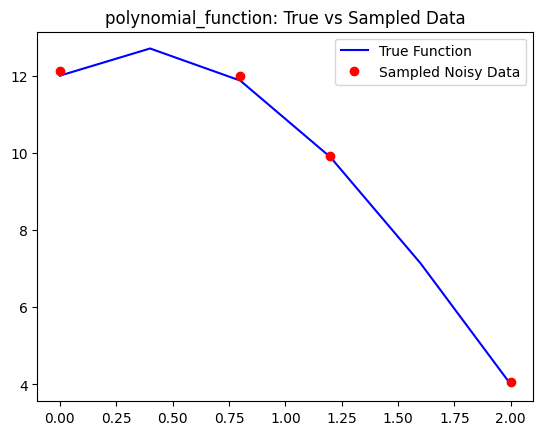

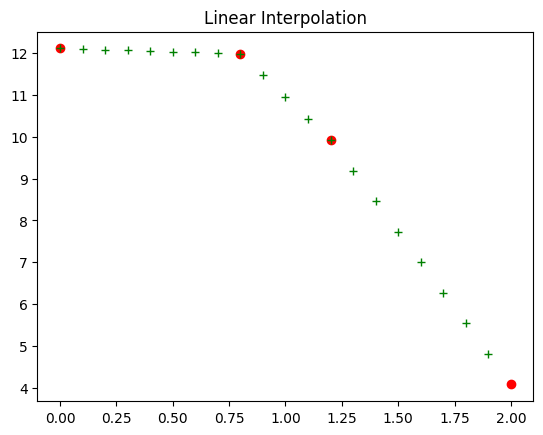

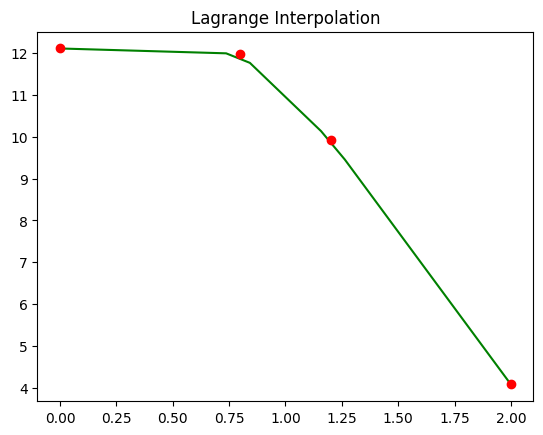

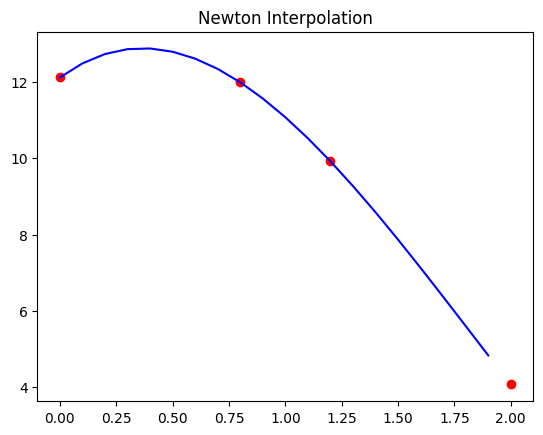

[0.  0.8 1.2 2. ]
[0.02390675 0.64751525 1.02871906 0.82546111]

harmonic_function:


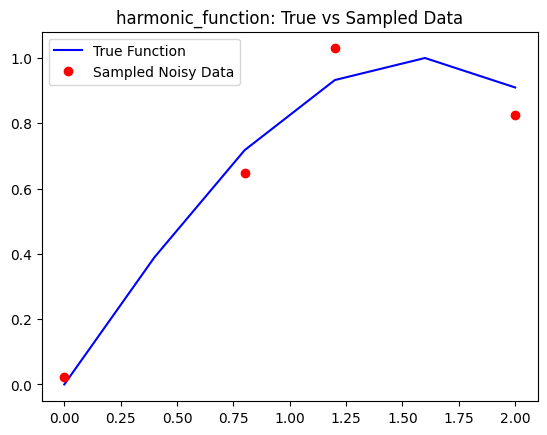

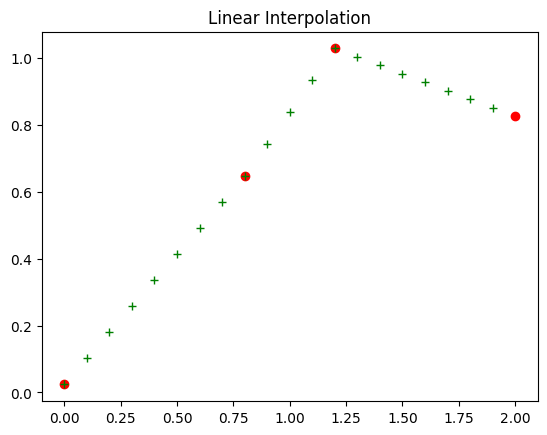

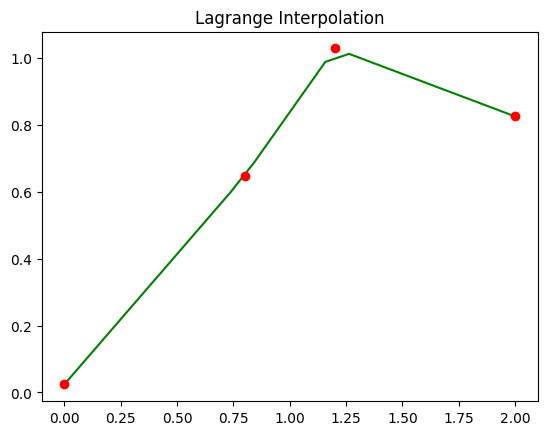

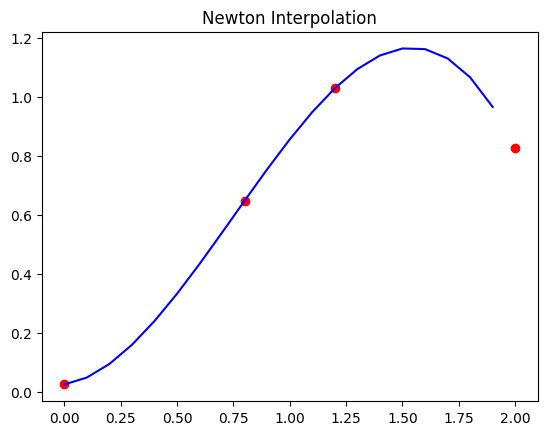

[0.  0.8 1.2 2. ]
[0.03791053 0.67646715 0.78319099 1.1658832 ]

logarithmic_function:


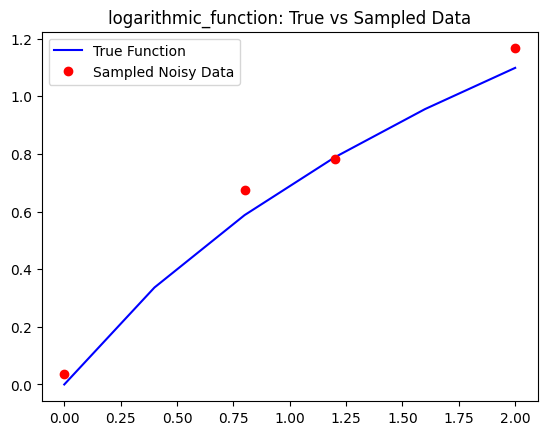

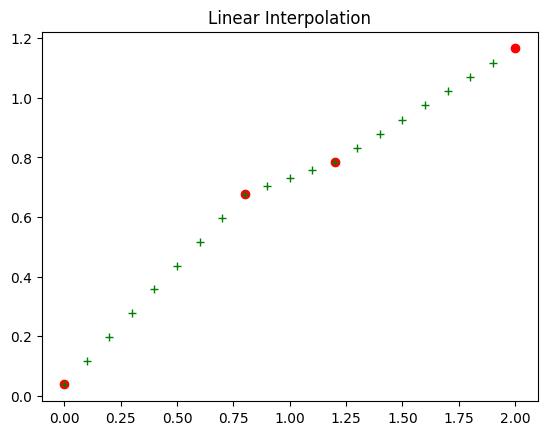

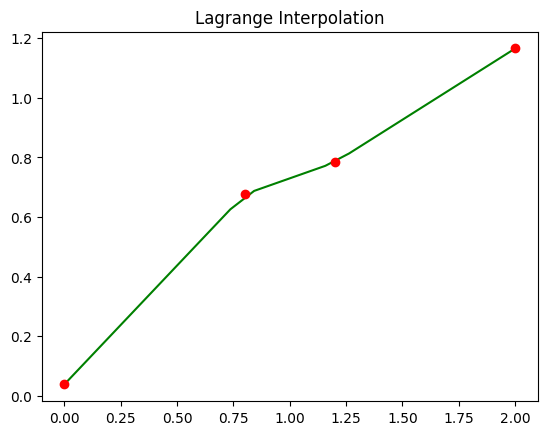

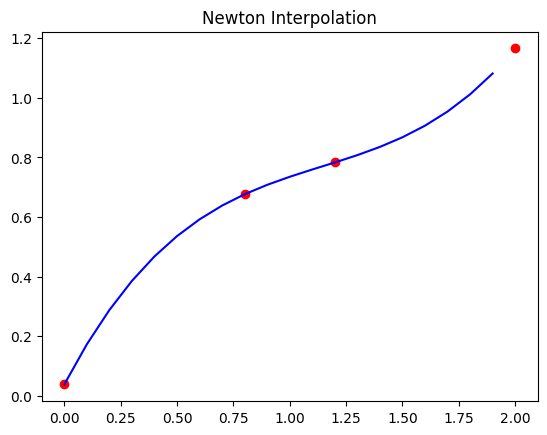

In [45]:
import numpy as np
from scipy import interpolate
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt


def polynomial_function(x):
    return x**3 - 6*x**2 + 4*x + 12

def harmonic_function(x):
    return np.sin(x)

def logarithmic_function(x):
    return np.log(x + 1)  

def add_noise(y, noise_level=0.1):
    noise = np.random.normal(0, noise_level, size=y.shape)
    return y + noise

def divided_diff(x, y):    
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
    return coef

def newton_poly(coef, x_data, x):
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p



functions = [polynomial_function, harmonic_function, logarithmic_function]
function_names = ["polynomial_function", "harmonic_function", "logarithmic_function"]

xstart = 0
xend = 2
nx = 6
dx = (xend - xstart)/(nx-1)
print(dx)
x = np.linspace(xstart, xend, nx)       
print(x)

indices = np.sort(np.random.choice(len(x), size=4, replace=False))  
x_sampled = x[indices]

for func, name in zip(functions, function_names):
    y_ori = func(x)
    y_sampled = add_noise(func(x_sampled))
    print(x_sampled)
    print(y_sampled)
    
    print(f"\n{name}:")
    plt.title(f"{name}: True vs Sampled Data")
    plt.plot(x, y_ori, 'b-', label="True Function")  # Original smooth function
    plt.plot(x_sampled, y_sampled, 'ro', label="Sampled Noisy Data")  # Sampled noisy points
    plt.legend()
    plt.show()

    phi = interpolate.interp1d(x_sampled, y_sampled)          
    xnew = np.arange(min(x_sampled), max(x_sampled), 0.1)                 
    ynew = phi(xnew)
    plt.title("Linear Interpolation")
    plt.plot(x_sampled, y_sampled, 'ro', xnew, ynew, 'g+')     
    plt.show()

    phi1 = lagrange(x_sampled, y_sampled)                                       
    xphi = np.linspace(min(x_sampled), max(x_sampled), 20)  
    plt.title("Lagrange Interpolation")
    plt.plot(xphi, phi(xphi), "g-")
    plt.plot(x_sampled, y_sampled, "ro")
    plt.show()

    a_s = divided_diff(x_sampled, y_sampled)[0, :]

    x_new = np.arange(min(x_sampled), max(x_sampled), 0.1)
    y_new = newton_poly(a_s, x_sampled, x_new)
    plt.title("Newton Interpolation")
    plt.plot(x_sampled, y_sampled, 'ro')
    plt.plot(x_new, y_new, "b-")
    plt.show()


    

    








